In [3]:
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit


%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print ('Boston housing dataset has {0} data points with {1} variables each'.format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each


In [5]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)
# Alternative using pandas
# minimum_price = prices.min()

# TODO: Maximum price of the data
maximum_price = np.max(prices)
# Alternative using pandas
# maximum_price = prices.max()

# TODO: Mean price of the data
mean_price = np.mean(prices)
# Alternative using pandas
# mean_price = prices.mean()

# TODO: Median price of the data
median_price = np.median(prices)
# Alternative using pandas
# median_price = prices.median()

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)
# Alternative using pandas 
# std_price = prices.std(ddof=0)
# Show the calculated statistics
print ("Statistics for Boston housing dataset:\n")
print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print ("Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


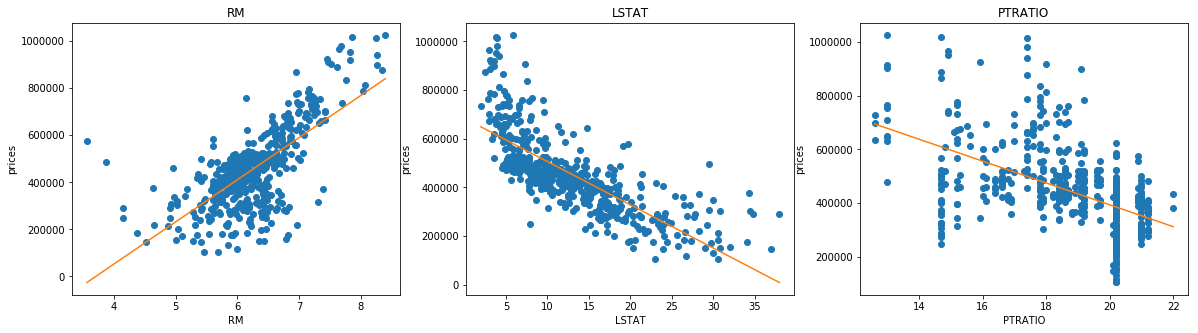

In [6]:
# Using pyplot
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))

# i: index
for i, col in enumerate(features.columns):
    # 3 plots here hence 1, 3
    plt.subplot(1, 3, i+1)
    x = data[col]
    y = prices
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

In [7]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

In [8]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

# Success
print ("Training and testing split was successful.")

Training and testing split was successful.


In [9]:
# Check if split is actually correct
# We can see it's roughly 80% train and 20% train
# So we can proceed!
print(features.shape[0])
print(float(X_train.shape[0]) / float(features.shape[0]))
print(float(X_test.shape[0]) / float(features.shape[0]))

489
0.7995910020449898
0.20040899795501022


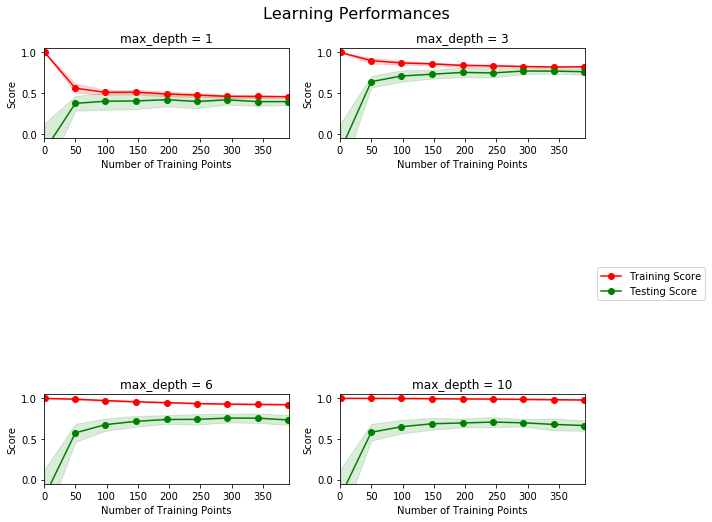

In [10]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

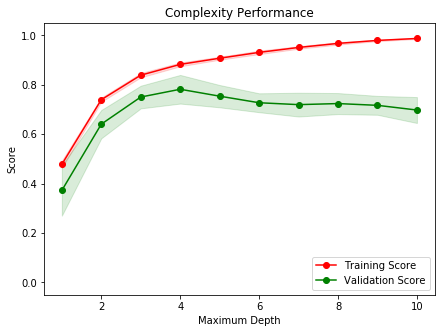

In [11]:
vs.ModelComplexity(X_train, y_train)

In [12]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # ShuffleSplit works iteratively compared to KFOLD
    # It saves computation time when your dataset grows
    # X.shape[0] is the total number of elements
    # n_iter is the number of re-shuffling & splitting iterations.
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    # Instantiate
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    #dt_range = range(1, 11)
   # params = dict(max_depth=dt_range)
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}
    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    # We initially created performance_metric using R2_score
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    # You would realize we manually created each, including scoring_func using R^2
    grid = GridSearchCV(regressor, params, cv=cv_sets, scoring=scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

C:\Users\Naveen\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [14]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print ("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


In [15]:
# We can access our value from reg.get_params(), a dictionary, using dict['key']
reg.get_params()['max_depth']

4

In [16]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print ("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $406,933.33
Predicted selling price for Client 2's home: $232,200.00
Predicted selling price for Client 3's home: $938,053.85
